In [34]:
# Load packages
import numpy as np
import xarray as xr
from pathlib import Path
import cftime
import pandas as pd

In [22]:
# Directory
dir = '/home/p/peltier/mahdinia/scratch/wrf/MPIESM12HR_S37_na24_conus43-flk_2039/'
# Test with one nc
test = xr.open_dataset(dir+'wrfavg/wrfhydro_d01_monthly.nc',chunks={'time':-1},decode_times=False)
# Modify time to datetime64
test['time'] = pd.date_range(start='2039-01-01', periods=test.sizes['time'], freq='MS')

In [24]:
test_mon=test.groupby('time.month').mean('time')

In [25]:
test_mon

<xarray.Dataset>
Dimensions:             (month: 12, south_north: 317, west_east: 370)
Coordinates:
  * month               (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: south_north, west_east
Data variables: (12/67)
    ACSNOM              (month, south_north, west_east) float32 dask.array<chunksize=(1, 317, 370), meta=np.ndarray>
    ACSNOW              (month, south_north, west_east) float32 dask.array<chunksize=(1, 317, 370), meta=np.ndarray>
    GRAUPELNC           (month, south_north, west_east) float32 dask.array<chunksize=(1, 317, 370), meta=np.ndarray>
    ITIMESTEP           (month) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    POTEVP              (month, south_north, west_east) float32 dask.array<chunksize=(1, 317, 370), meta=np.ndarray>
    RAINC               (month, south_north, west_east) float32 dask.array<chunksize=(1, 317, 370), meta=np.ndarray>
    ...                  ...
    MaxNetWaterFlux_5d  (month, south_north, west_east) float32 dask.array<chunksize=(1, 317, 370), meta=np.ndarray>
    MaxWaterForcing_5d  (month, south_north, west_east) float32 dask.array<chunksize=(1, 317, 370), meta=np.ndarray>
    MinRAIN_5d          (month, south_north, west_east) float32 dask.array<chunksize=(1, 317, 370), meta=np.ndarray>
    MinNetPrecip_5d     (month, south_north, west_east) float32 dask.array<chunksize=(1, 317, 370), meta=np.ndarray>
    MinNetWaterFlux_5d  (month, south_north, west_east) float32 dask.array<chunksize=(1, 317, 370), meta=np.ndarray>
    MinWaterForcing_5d  (month, south_north, west_east) float32 dask.array<chunksize=(1, 317, 370), meta=np.ndarray>

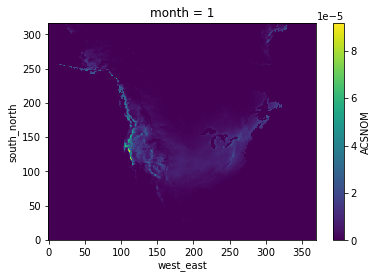

In [33]:
months= np.arange(1,13,1)
for m in months:
test_mon.ACSNOM.sel(month=1).plot()